In [60]:
import torch
import torch.nn as nn


In [61]:
import sys
from plot import *
from square_sequences import *

### RNN Cell

In [62]:
points, directions = generate_sequences(n=128, seed=13)


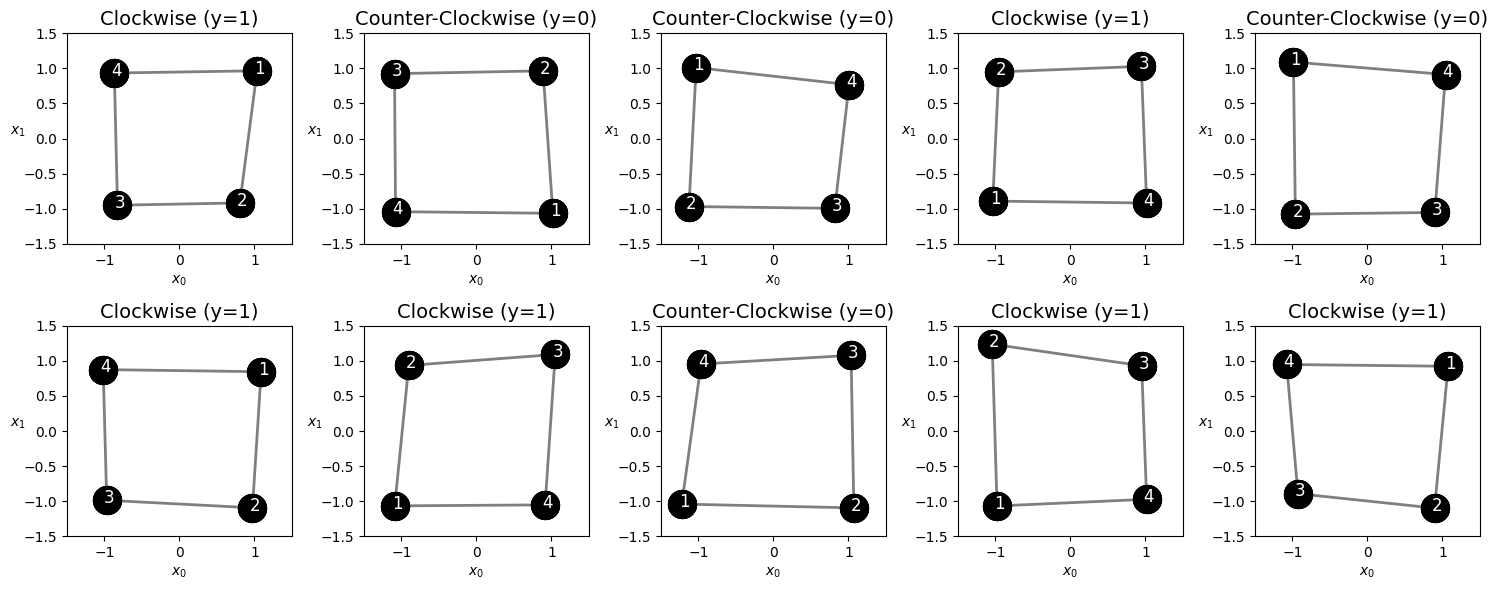

In [63]:
fig = plot_data(points, directions)

In [64]:
n_feature = 2
hidden_dim = 2



In [65]:
torch.manual_seed(19)

In [66]:
rnn_cell = nn.RNNCell(input_size=n_feature, hidden_size=hidden_dim)

In [67]:
rnn_state = rnn_cell.state_dict()
rnn_state

OrderedDict([('weight_ih',
              tensor([[ 0.6627, -0.4245],
                      [ 0.5373,  0.2294]])),
             ('weight_hh',
              tensor([[-0.4015, -0.5385],
                      [-0.1956, -0.6835]])),
             ('bias_ih', tensor([0.4954, 0.6533])),
             ('bias_hh', tensor([-0.3565, -0.2904]))])

In [68]:
linear_input = nn.Linear(in_features=n_feature, out_features=hidden_dim)
linear_hidden = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)


In [69]:
with torch.no_grad():
    linear_input.weight = nn.Parameter(rnn_state["weight_ih"])
    linear_input.bias  = nn.Parameter(rnn_state["bias_ih"])
    linear_hidden.weight = nn.Parameter(rnn_state["weight_hh"])
    linear_hidden.bias = nn.Parameter(rnn_state["bias_hh"])


In [70]:
initial_hidden = torch.zeros(1, hidden_dim)
initial_hidden

tensor([[0., 0.]])

In [71]:
th =  linear_hidden(initial_hidden)
th

tensor([[-0.3565, -0.2904]], grad_fn=<AddmmBackward0>)

In [72]:
X = torch.tensor([[ 1.0349, 0.9661],
[ 0.8055, -0.9169],
[-0.8251, -0.9499],
[-0.8670, 0.9342]])
X

tensor([[ 1.0349,  0.9661],
        [ 0.8055, -0.9169],
        [-0.8251, -0.9499],
        [-0.8670,  0.9342]])

In [73]:
tx = linear_input(X[0:1])
tx

tensor([[0.7712, 1.4310]], grad_fn=<AddmmBackward0>)

In [74]:
adding = th + tx
adding

tensor([[0.4147, 1.1406]], grad_fn=<AddBackward0>)

In [75]:
torch.tanh(adding)

tensor([[0.3924, 0.8146]], grad_fn=<TanhBackward0>)

In [76]:
rnn_cell(X[0:1])

tensor([[0.3924, 0.8146]], grad_fn=<TanhBackward0>)

In [77]:
hidden = initial_hidden
for i in range(X.shape[0]):
    hidden = rnn_cell(X[i:i+1], hidden)
    print(hidden)
    

tensor([[0.3924, 0.8146]], grad_fn=<TanhBackward0>)
tensor([[ 0.4347, -0.0481]], grad_fn=<TanhBackward0>)
tensor([[-0.1521, -0.3368]], grad_fn=<TanhBackward0>)
tensor([[-0.5297,  0.3551]], grad_fn=<TanhBackward0>)


### RNN Layer

In [78]:
n_features = 2
hidden_dim = 2

In [79]:
torch.manual_seed(19)
rnn = nn.RNN(input_size=n_features, hidden_size=hidden_dim)
rnn_state = rnn.state_dict()
rnn_state

OrderedDict([('weight_ih_l0',
              tensor([[ 0.6627, -0.4245],
                      [ 0.5373,  0.2294]])),
             ('weight_hh_l0',
              tensor([[-0.4015, -0.5385],
                      [-0.1956, -0.6835]])),
             ('bias_ih_l0', tensor([0.4954, 0.6533])),
             ('bias_hh_l0', tensor([-0.3565, -0.2904]))])

### Shapes

In [80]:
batch = torch.as_tensor(points[:3]).float()
batch.shape

torch.Size([3, 4, 2])

In [81]:
permuted_batch = batch.permute(1, 0, 2)
permuted_batch.shape

torch.Size([4, 3, 2])

In [82]:
torch.manual_seed(19)
rnn = nn.RNN(input_size=n_features, hidden_size=hidden_dim)
out, final_hidden = rnn(permuted_batch)
out.shape, final_hidden.shape

(torch.Size([4, 3, 2]), torch.Size([1, 3, 2]))

In [83]:
(out[-1] == final_hidden).all()

tensor(True)

In [85]:
batch_hidden = final_hidden.permute(1, 0, 2)
batch.shape

torch.Size([3, 4, 2])

 set RNN’s batch_first
argument to True

In [86]:
torch.manual_seed(19)
rnn_batch_first = nn.RNN(input_size=n_features,
hidden_size=hidden_dim,
batch_first=True)
out, final_hidden = rnn_batch_first(batch)
out.shape, final_hidden.shape

(torch.Size([3, 4, 2]), torch.Size([1, 3, 2]))